Playing around with data and code so will be unstructured. See [visual-main notebook]() for structure

Load and run main notebook to get `visual_features_paths` variable

In [1]:
main_notebook = 'main.ipynb'

In [2]:
# %load main_notebook
main.ipynb

In [3]:
%run 'main.ipynb'

# Plot image

In [ ]:
show_image = visual_features_paths[0]
load_audio_features_file = np.load(show_image)
# load_audio_features_file.images.shape

In [ ]:
# print(visual_features_paths[0])
%matplotlib widget 

In [ ]:
from PIL import Image
# from numpy import *

# im = array(Image.open('image.jpg'))
Image.fromarray(load_audio_features_file).show()

In [ ]:
# import numpy as np
# from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import array_to_img


# img = np.array([255,255], np.uint8)
# b = array_to_img(img)
c = array_to_img(load_audio_features_file)

c

In [ ]:
from PIL import Image
# from keras import array_to_img
import tensorflow as tf

# img = np.random.random(size=(50, 200, 3))
pil_img = tf.keras.utils.array_to_img(load_audio_features_file)
pil_img

In [ ]:
# PIL.Image.open(str(roses[0]))
Image.open(str(load_audio_features_file))

In [ ]:

print(type(load_audio_features_file), load_audio_features_file.shape)
plt.imshow(load_audio_features_file)
plt.show()

In [ ]:
%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
viewer = fig.add_subplot(111)

plt.ion() # Turns interactive mode on (probably unnecessary)
fig.show() # Initially shows the figure
# for i in range(6):
#     frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

frames = load_audio_features_file.tolist()
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

In [ ]:
frames = load_audio_features_file.tolist()

for i in range(len(frames)):
    viewer.clear() # Clears the previous image
    viewer.imshow(frames[i]) # Loads the new image
    plt.pause(.1) # Delay in seconds
    fig.canvas.draw() # Draws the image to the screen

In [ ]:
N, D = load_audio_features_file.shape
plt.plot(N, D)
print(type(load_audio_features_file))

In [ ]:
def cv2numpy(cvarr):
    a = np.asarray(cv.GetMat(cvarr))
    return a


In [ ]:
cv::Mat(sample, false)

cv2::Mat(load_audio_features_file, false)

In [ ]:
def reduce_dim(specific_file):
    """
    Parameters:
    
    Return:
    """
    
    N, D = specific_file.shape
    # print(N, D)
    reduced_dim_array = np.column_stack((np.repeat(np.arange(N),D), specific_file.reshape(N*D,-1)))
    # df = pd.DataFrame(reduced_dim_file) 
    
    return

In [ ]:
for visual_features_path in visual_features_paths:
    # print("Current path with files is: ", visual_features_path)
    path_exists = os.path.exists(visual_features_path)
    # print(path_exists)
    if path_exists == True:
        # print("Current path with files is: ", visual_features_path)
        load_audio_features_file = np.load(visual_features_path)
        # reduce_dim(load_audio_features_file)
    else:
        # print("CANNOT find current path: ", visual_features_path)
        pass

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [ ]:

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc

In [ ]:
clf = GridSearchCV(svc, parameters)
clf

In [ ]:
clf.fit(iris.data, iris.target)

In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
def reduce_temporal_dimension(visual_features_paths):
    """Reduce from 2D to 1D by removing the time dimension
    
    visual_features_paths -- list
    
    Return 
    reduced shapes of each input -- list
    """
    reduced_visual_features = []
    
    for visual_features_path in visual_features_paths:
        # print("Current path with files is: ", visual_features_path)
        path_exists = os.path.exists(visual_features_path)
        # print(path_exists)
        if path_exists == True:
            # print("Current path with files is: ", visual_features_path)
            load_visual_features_file = np.load(visual_features_path)
            # print("  Original Shape: ", np.shape(load_visual_features_file))
            resampled_visual = np.mean(load_visual_features_file, axis=0)
            reduced_visual_features.append(resampled_visual)
            # print("  Reduced shape: ", np.shape(resampled_visual))
            # print()
        else:
            # print()
            # print("\nCANNOT find current path: ", visual_features_path)
            pass
    return reduced_visual_features


In [ ]:
reduced_temporal_dimensions = reduce_temporal_dimension(visual_features_paths)
# type(reduced_temporal_dimensions), reduced_temporal_dimensions

https://scikit-learn.org/stable/modules/svm.html#multi-class-classification

In [ ]:
from sklearn import svm
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(X, Y)

In [ ]:
dec = svm.decision_function([[1]])
dec.shape[1],dec # 4 classes: 4*3/2 = 6

In [ ]:
svm.decision_function_shape = "ovr"
dec = svm.decision_function([[1]])
dec.shape[1], dec

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = skl_model_selection.GridSearchCV(svm, parameters, cv=10)
clf

https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
print(X.shape)
y = iris.target
print(y.shape)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

In [ ]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [6]:
ys = features_with_y.loc[0:, 'emotion_labels']
# ys

In [13]:
def reduce_temporal_dimension(visual_features_paths, ys):
    """Reduce from 2D to 1D by removing the time dimension
    
    visual_features_paths -- list
    
    Return 
    reduced shapes of each input -- list
    """
    reduced_visual_features = []
    true_labels = []
    
    for row in range(len(visual_features_paths)):
        # print(ys[row])
        # print("Current path with files is: ", visual_features_path)
        path_exists = os.path.exists(visual_features_paths[row])
        # print(path_exists)
        if path_exists == True:
            # print("Current path with files is: ", visual_features_path)
            load_visual_features_file = np.load(visual_features_paths[row])
            # print("  Original Shape: ", np.shape(load_visual_features_file))
            resampled_visual = np.mean(load_visual_features_file, axis=0)
            reduced_visual_features.append(resampled_visual)
            # print("  Reduced shape: ", np.shape(resampled_visual))
            # print()
            true_labels.append(ys[row])
        else:
            # print()
            
            # print("\nCANNOT find current path: ", visual_features_paths[row])
            # print("DoNOT include", ys[row])
            pass
    return reduced_visual_features, true_labels

In [14]:
reduced_temporal_dimensions, true_labels = reduce_temporal_dimension(visual_features_paths, ys)
np.shape(reduced_temporal_dimensions), np.shape(true_labels)

((1003, 2048), (1003,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(reduced_temporal_dimensions, true_labels, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_test)
total_Y = len(y_train) + len(y_test)
len(X_train), len(X_test), len(y_train), len(y_test), total_X, total_Y

(300, 703, 300, 703, 1003, 1003)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_val)
total_Y = len(y_train) + len(y_val)
len(X_train), len(X_val), len(y_train), len(y_val), total_X, total_Y, np.shape(X_train), np.shape(y_train)

(90, 210, 90, 210, 300, 300, (90, 2048), (90,))

In [ ]:
# from matplotlib import pyplot as plt


In [ ]:
def plot_points(features, labels):
    
    # print(type(features))
    X = np.array(features)
    # print(X)
    y = np.array(labels)
    # print(y)
    
    # print("y=0", np.argwhere(y==0))
    
    anger = X[np.argwhere(y==0)]
    # print(anger[0:8, 0:2].shape)
    # for s in anger:
    #     print(s)
    #     print(s[0][0])
    #     print(s[0][1])
    sadness = X[np.argwhere(y==1)]
    # print(sadness[0:8, 0:2].shape)
    happiness = X[np.argwhere(y==2)]
    # print(happiness[0:8, 0:2].shape)
    neutral = X[np.argwhere(y==3)]
    # print(neutral[0:8, 0:2].shape)
    
    plt.scatter([s[0][0] for s in anger],
                   [s[0][1] for s in anger],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    
    plt.scatter([s[0][0] for s in sadness],
                   [s[0][1] for s in sadness],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    
#     plt.scatter([s[0][0] for s in happiness],
#                    [s[0][1] for s in happiness],
#                    s = 25,
#                    color = 'blue',
#                    edgecolor = 'k',
#                    marker = 'v')
    
    
#     plt.scatter([s[0][0] for s in neutral],
#                    [s[0][1] for s in neutral],
#                    s = 25,
#                    color = 'orange',
#                    edgecolor = 'k',
#                    marker = 'o')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])
    plt.show()

In [ ]:
X_train = np.array([X_train]).reshape(60, 2048) 
print(X_train.shape)
X_train_new = X_train[0:, 0:2]
print(X_train_new.shape)

y_train = np.array([y_train]).reshape(60, 1).astype(int)
print(y_train.shape)
# y_train_new = y_train[0:2, 0]
# print(y_train_new.shape)

# plot_points(X_train_new, y_train)

In [ ]:
train_y_df = pd.DataFrame(y_train, columns=['y_train'])
# train_y_df

In [ ]:
train_X_df = pd.DataFrame(X_train)
# train_X_df

In [ ]:
train_df = pd.concat([train_y_df, train_X_df], axis=1)
# train_df

In [ ]:
# train_df.iloc[0:5, 0:3]
# X = np.array(train_df[[0, 1]]) 
# # print(X)
# y = np.array(train_df['y_train']).astype(int)
# plot_points(X,y)
# plt.show()

In [17]:
# estimator is LinearSVC()
linear_classifier = svm.LinearSVC()
parameters = param_grid = {
    'C': [0.01, 0.1, 10, 100], 
    # 'class_weight': [1],
    # 'dual':,
    'fit_intercept': [True, False],
    # 'intercept_scaling':,
    'loss': ['hinge', 'squared_hinge'],
    # 'max_iter':,
     # 'multi_class': [1],
    # 'penalty': ['l1', 'l2'],
    'penalty': ['l2'],
    # 'random_state':,
    # 'tol': , 
    # 'verbose':    
}

classification = GridSearchCV(linear_classifier, param_grid=parameters, cv=10, return_train_score=True)
classification

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [18]:
classification.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [19]:
print(classification.best_estimator_)

LinearSVC(C=0.01)


In [24]:
print("Accuracy:"+ str(classification.score(X_train, y_train)))

Accuracy:1.0


In [ ]:
# note difference in Accuracy with 'fit_intercept': [True'] vs 'fit_intercept': [False],
print(classification.best_params_)
print("Accuracy:"+ str(classification.best_score_))

In [33]:
# classification.cv_results_

In [34]:
y_pred = classification.predict(X_test)
# y_pred

In [35]:
# print(classification_report(y_test, y_pred))

In [26]:
svm_c_001 = svm.LinearSVC(C=0.01)
svm_c_001.fit(X_train,y_train) 
print("C = 0.1") 
print("Accuracy:", svm_c_001.score(X_train,y_train)) 
# plot_model(X,y,svm_c_001)

# C = 100 
svm_c_100 = svm.LinearSVC(C=100) 
svm_c_100.fit(X_train,y_train)
print("C = 100") 
print("Accuracy:", svm_c_100.score(X_train,y_train))

C = 0.1
Accuracy: 1.0
C = 100
Accuracy: 1.0


In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3712660028449502

# Before Hyper-Parameter Tuning

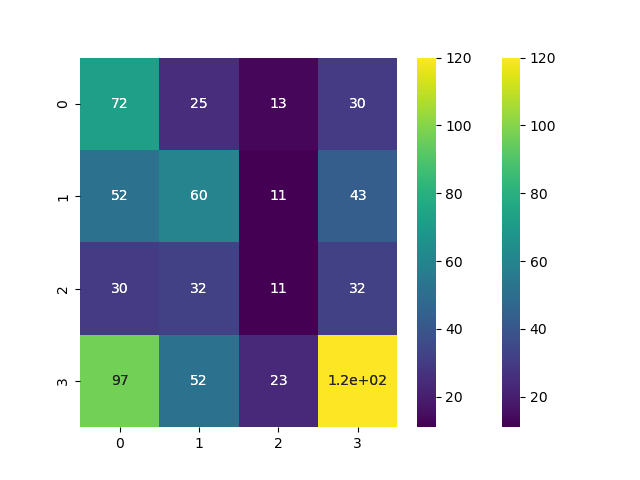

In [62]:
before_hp_model = svm.LinearSVC()
before_hp_model.fit(X_train, y_train)
y_pred = before_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.51      0.37       140
           1       0.36      0.36      0.36       166
           2       0.19      0.10      0.13       105
           3       0.53      0.41      0.46       292

    accuracy                           0.37       703
   macro avg       0.34      0.35      0.33       703
weighted avg       0.39      0.37      0.37       703



# After Hyper-Parameter Tuning

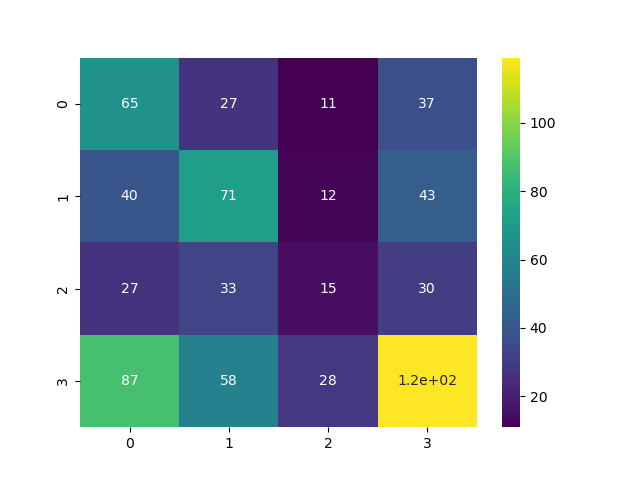

In [63]:
after_hp_model = svm.LinearSVC(C=0.01, fit_intercept=True, loss='squared_hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.46      0.36       140
           1       0.38      0.43      0.40       166
           2       0.23      0.14      0.18       105
           3       0.52      0.41      0.46       292

    accuracy                           0.38       703
   macro avg       0.35      0.36      0.35       703
weighted avg       0.40      0.38      0.38       703



In [55]:
after_hp_model = svm.LinearSVC(C=1, fit_intercept=True, loss='squared_hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.51      0.37       140
           1       0.36      0.36      0.36       166
           2       0.19      0.10      0.13       105
           3       0.53      0.41      0.46       292

    accuracy                           0.37       703
   macro avg       0.34      0.35      0.33       703
weighted avg       0.39      0.37      0.37       703



In [57]:
after_hp_model = svm.LinearSVC(C=10, fit_intercept=True, loss='squared_hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.51      0.37       140
           1       0.35      0.36      0.35       166
           2       0.19      0.10      0.13       105
           3       0.53      0.41      0.46       292

    accuracy                           0.37       703
   macro avg       0.34      0.35      0.33       703
weighted avg       0.39      0.37      0.37       703

